In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('quintoandar_eda_data.csv')

In [3]:
df = pd.get_dummies(df, drop_first=True)

In [4]:
X = df.drop(['total'], axis=1)
y = df['total'].values

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [6]:
X = df.drop(['total'], axis=1)
y = df['total'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train size:', X_train.shape, '\nTest size:', X_test.shape )

result = []

Train size: (5776, 56) 
Test size: (1445, 56)


In [7]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Train error: ', cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'), \
     '\nTest error: ', mean_absolute_error(y_test, lr.predict(X_test)))
result.append(mean_absolute_error(y_test, lr.predict(X_test)))

Train error:  [-1081.4777776  -1042.04058498 -1068.03919834 -1075.50898658
 -1033.66859414] 
Test error:  1072.2485293773937


In [8]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)
print('Train error: ', cross_val_score(dtree, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'), \
     '\nTest error: ', mean_absolute_error(y_test, dtree.predict(X_test)))
result.append(mean_absolute_error(y_test, dtree.predict(X_test)))

Train error:  [-882.0643887  -765.01694084 -841.2481509  -908.51301381 -808.91032571] 
Test error:  773.1254814082496


In [9]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
print('Train error: ', cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'), \
     '\nTest error: ', mean_absolute_error(y_test, rf.predict(X_test)))
result.append(mean_absolute_error(y_test, rf.predict(X_test)))

Train error:  [-800.37340749 -741.05661663 -779.02066324 -798.29562015 -721.91510653] 
Test error:  747.1790789338112


In [11]:
# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)
print('Train error: ', cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'), \
     '\nTest error: ', mean_absolute_error(y_test, xgb.predict(X_test)))
result.append(mean_absolute_error(y_test, xgb.predict(X_test)))

[23:59:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:59:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:59:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:59:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:59:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:59:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train error:  [-946.17053233 -926.50442286 -944.60578148 -958.02508265 -880.50915739] 
Test error:  967.8617494998919


## Feature Selection

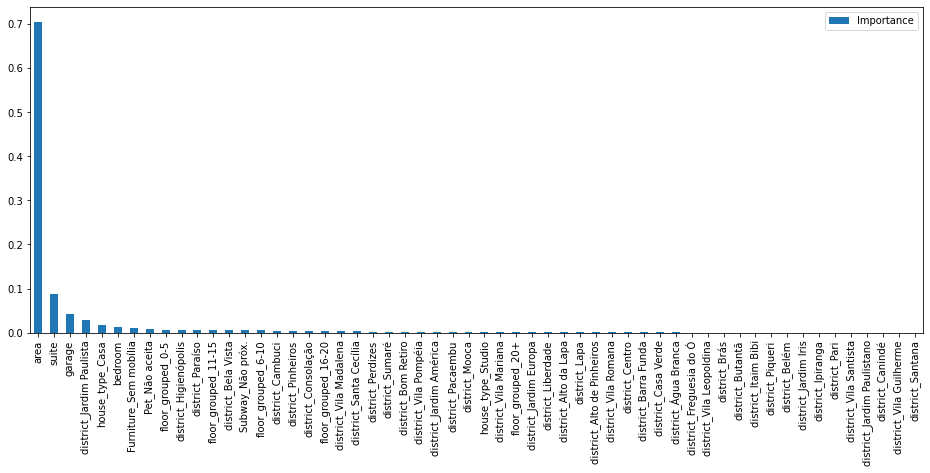

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, y)

aux = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
aux[aux['Importance'] > 0].plot(kind='bar', figsize=(16,6))

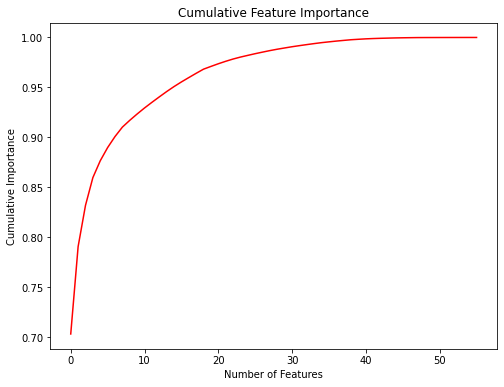

In [13]:
plt.figure(figsize = (8, 6))
plt.plot(list(range(len(aux))), np.cumsum(aux['Importance']).values, 'r-')
plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
plt.title('Cumulative Feature Importance');

In [14]:
importance = 0.99
print(np.min( np.where( np.cumsum(aux['Importance']) >= importance ) ) +1, " features required for ", importance, " importance")

31  features required for  0.99  importance


In [15]:
#Using N best parameters
N = 31
X_new = X[aux[:N].index.values]

y = df['total'].values

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
print('Train size:', X_train.shape, '\nTest size:', X_test.shape )

result2 = []

Train size: (5776, 31) 
Test size: (1445, 31)


In [16]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Train error: ', cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'), \
     '\nTest error: ', mean_absolute_error(y_test, lr.predict(X_test)))
result2.append(mean_absolute_error(y_test, lr.predict(X_test)))

Train error:  [-1083.4870055  -1048.41759095 -1074.9447756  -1069.51487686
 -1041.43536675] 
Test error:  1079.1787364053482


In [17]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)
print('Train error: ', cross_val_score(dtree, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'), \
     '\nTest error: ', mean_absolute_error(y_test, dtree.predict(X_test)))
result2.append(mean_absolute_error(y_test, dtree.predict(X_test)))

Train error:  [-881.87690311 -798.26062461 -825.43759019 -900.47125335 -828.9366914 ] 
Test error:  777.3981309386501


In [18]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
print('Train error: ', cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'), \
     '\nTest error: ', mean_absolute_error(y_test, rf.predict(X_test)))
result2.append(mean_absolute_error(y_test, rf.predict(X_test)))

Train error:  [-819.92703289 -750.9664571  -785.57949987 -810.82647952 -735.55171714] 
Test error:  749.7840034699706


In [19]:
# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)
print('Train error: ', cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'), \
     '\nTest error: ', mean_absolute_error(y_test, xgb.predict(X_test)))
result2.append(mean_absolute_error(y_test, xgb.predict(X_test)))

[00:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train error:  [-955.68234464 -931.15198695 -949.25825676 -965.12088047 -883.29099798] 
Test error:  971.3383448617269


In [20]:
aux = pd.DataFrame([result, result2]
             , index=['MAE Without Feature Selection','MAE With Feature Selection']
             , columns=['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']).T

aux

,MAE Without Feature Selection,MAE With Feature Selection
Linear Regression,1072.248529,1079.178736
Decision Tree,773.125481,777.398131
Random Forest,747.179079,749.784003
XGBoost,967.861749,971.338345


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


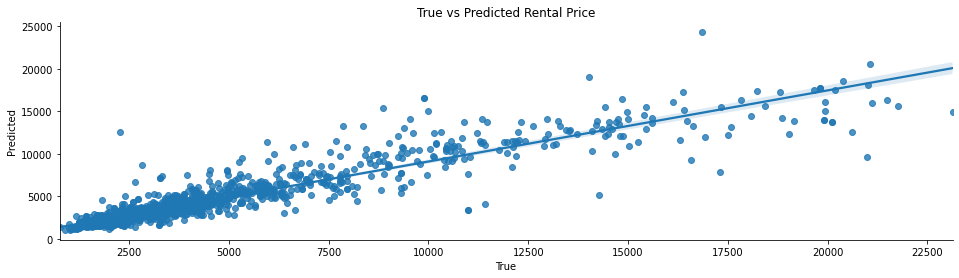

In [28]:
plt.figure(figsize=(16,4))
sns.regplot(y_test, rf.predict(X_test))
plt.title('True vs Predicted Rental Price')
plt.xlabel('True')
plt.ylabel('Predicted')
sns.despine()
